# Final Project 

In this project I will be practicing the categorization machine learning model in order to determine whether someone is prone to having a heart attack or not

## Data Exploration and Analysis

In [1]:
#Import all the libraries for the exploratory analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [194]:
heart_df = pd.read_csv('heart.csv')

In [195]:
heart_df.shape

(303, 14)

In [654]:
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [197]:
for i in heart_df.columns:
    print (i, heart_df[i].unique())

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trtbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
restecg

## Continuous Variables
* Age
* trtbps ( Resting Blood Pressure (in mm Hg on admission to the hospital))
* chol (Serum Cholesterol in mg/dl)
* thalachh (Maximum Heart Rate Achieved) 
* oldpeak (ST Depression Induced by Exercise Relative to Rest).

## Categorical Variables:
* Sex 1: Male; 0:Female
* cp (Chest Pain)0 = Assymptomatic, 1 = Typical angina; 2 = Atypical angina; 3 = Non-anginal pain
* fbs (Fasting Blood Sugar > 120mg/dl) 0=True; 1=False.
* restecg (Resting Electrocardiographic Results) 0 = Hypertrophy; 1 = Normal, 2= Having ST-T wave abnormality. 
* exgn ( Exercise Indulged Angina) 0 = No; 1= Yes.
* slp (The Slope of the Peak Exercise ST Segment) 0= Downslopping, 1= Flat , 2= Upsloping. 
* caa (Number of Major Vessels) 0-3 colored by Fluoroscopy
* thall (Thallium Stress Test Result) 0=Null; 1= Fixed defect; 2 = Normal; 3= Reversible Defect. 




In [10]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
#There are not null items
heart_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [16]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
heart_df.nunique().sort_values()

sex           2
fbs           2
exng          2
output        2
restecg       3
slp           3
cp            4
thall         4
caa           5
oldpeak      40
age          41
trtbps       49
thalachh     91
chol        152
dtype: int64

# Continuous Variables

In [198]:
cont_var = heart_df[['age', 'trtbps', 'chol' , 'thalachh', 'oldpeak']]
cont_var.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


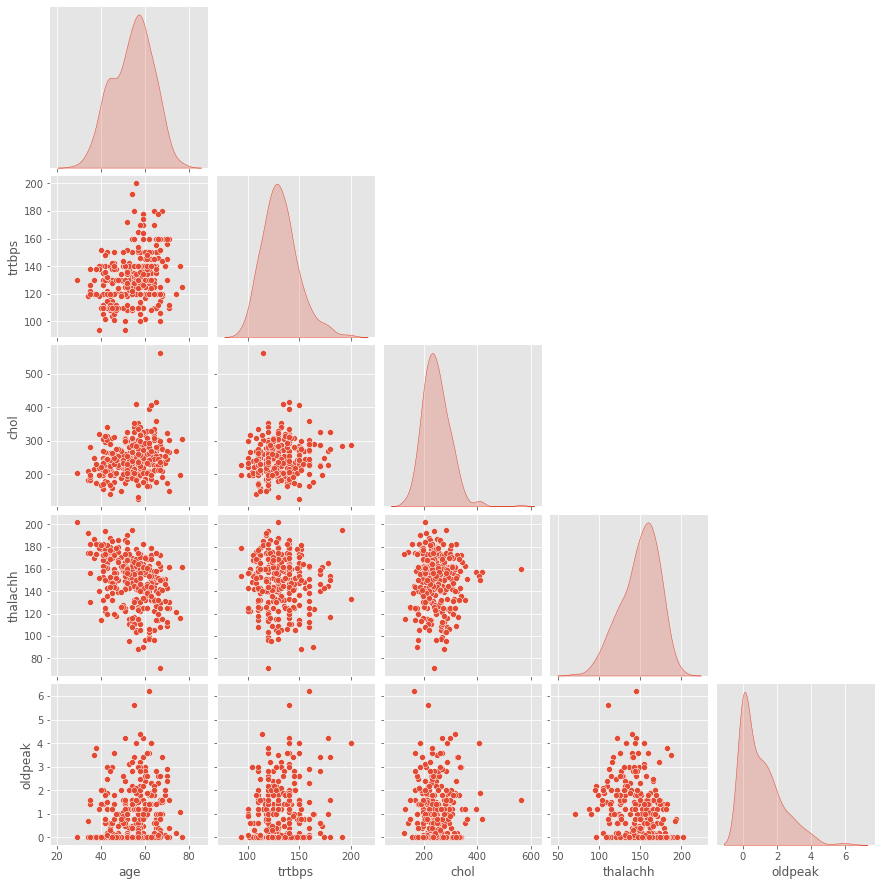

In [199]:
sns.pairplot(cont_var, diag_kind = 'kde', height = 2.5, corner = True)

We will transform the oldpeak feature to be log normal as implied in the histogram above and we will re plot the histograms. 

In [218]:
cont_var_transformed = cont_var.copy()


In [219]:
cont_var_transformed['log_oldpeak']= np.log(cont_var['oldpeak'])
cont_var_transformed['log_chol']= np.log(cont_var['chol'])

/Users/danipach/opt/anaconda3/envs/LHL22Bootcamp/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



In [222]:
#Change order so log transform is next to original column
cont_var_transformed = cont_var_transformed[['age', 'trtbps', 'chol', 'log_chol', 'thalachh' , 'oldpeak', 'log_oldpeak' ]]
cont_var_transformed

,age,trtbps,chol,log_chol,thalachh,oldpeak,log_oldpeak
0,63,145,233,5.451038,150,2.3,0.832909
1,37,130,250,5.521461,187,3.5,1.252763
2,41,130,204,5.318120,172,1.4,0.336472
3,56,120,236,5.463832,178,0.8,-0.223144
4,57,120,354,5.869297,163,0.6,-0.510826
...,...,...,...,...,...,...,...
298,57,140,241,5.484797,123,0.2,-1.609438
299,45,110,264,5.575949,132,1.2,0.182322
300,68,144,193,5.262690,141,3.4,1.223775
301,57,130,131,4.875197,115,1.2,0.182322


In [362]:
#Replace the infinity values obtained from the log normal transformation with a zero because the origna
test = cont_var_transformed[cont_var_transformed['log_oldpeak'] == -np.inf]
test['oldpeak'].unique()

array([0.])

In [363]:
cont_var_transformed['log_oldpeak'] = cont_var_transformed ['log_oldpeak'].replace(-np.inf,0)

In [366]:
cont_var_transformed.head()

,age,trtbps,chol,log_chol,thalachh,oldpeak,log_oldpeak
0,63,145,233,5.451038,150,2.3,0.832909
1,37,130,250,5.521461,187,3.5,1.252763
2,41,130,204,5.318120,172,1.4,0.336472
3,56,120,236,5.463832,178,0.8,-0.223144
4,57,120,354,5.869297,163,0.6,-0.510826


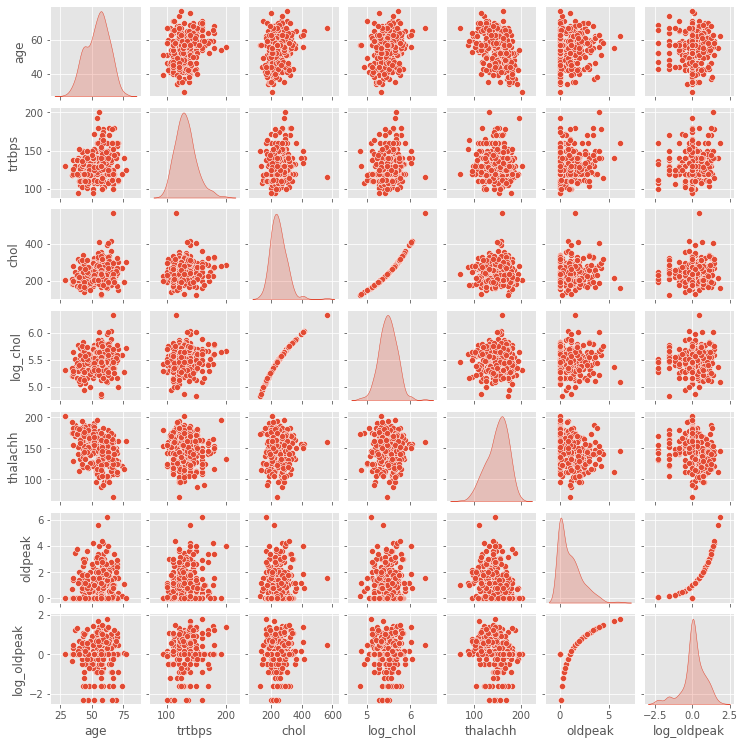

In [616]:
sns.pairplot(cont_var_transformed, diag_kind = 'kde', height = 1.5)

For our features, we will be using teh log_oldpeak and log_chol as they appear to be lognormally distributed. 


## Relationship between cholesterol and age

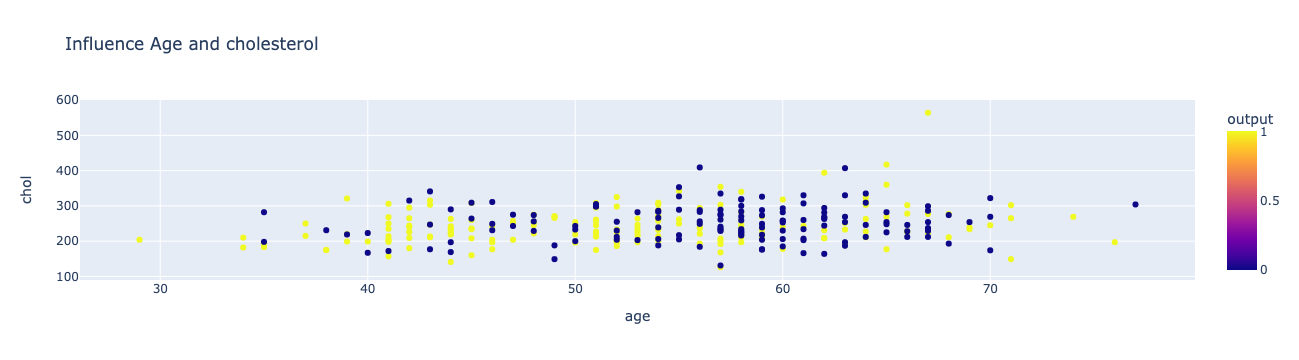

In [593]:
px.scatter(heart_df,x="age",y="chol",color="output",title="Influence Age and cholesterol")

* 0 = Less chance of heart attack
* 1 = more chance of heard attack
* Looks like people between the age of 40 and 50 have a high chance of getting a heart attack.

<AxesSubplot:title={'center':' Number of Patients by Age '}, xlabel='age'>

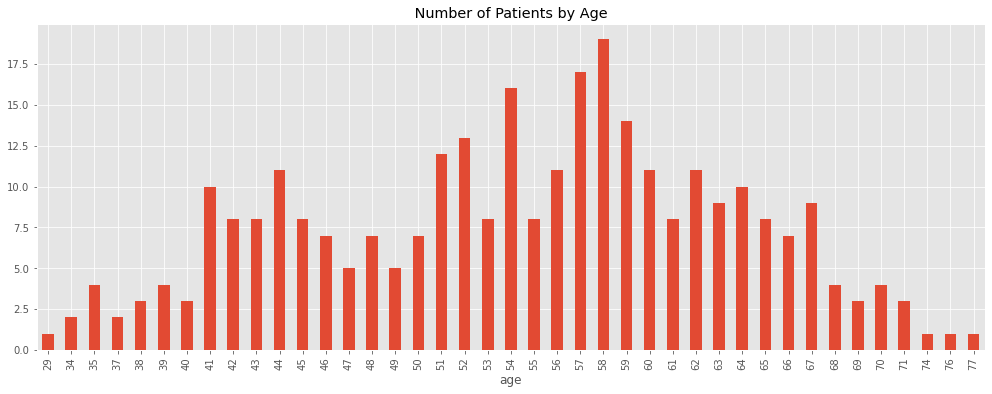

In [238]:
# make groupby and bar graph to number of patients by age. 

heart_df.groupby('age')["output"].count().plot(kind="bar",figsize=(17,6), title=" Number of Patients by Age ")

/Users/danipach/opt/anaconda3/envs/LHL22Bootcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/danipach/opt/anaconda3/envs/LHL22Bootcamp/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



Text(0.5, 1.0, 'Distritbution by Age')

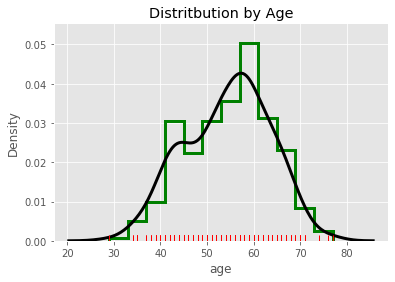

In [626]:

ax = sns.distplot(heart_df['age'], rug=True, rug_kws={"color": "r"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
ax.set_title('Distritbution by Age')

# Categorical Variables

In [644]:
cat_var = heart_df[['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']]
cat_var

,sex,cp,fbs,restecg,exng,slp,caa,thall
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3
299,1,3,0,1,0,1,0,3
300,1,0,1,1,0,1,2,3
301,1,0,0,1,1,1,1,3


In [629]:
testing = cat_var.copy()

In [630]:
testing['target'] = heart_df['output']

In [631]:
testing.head()

,sex,cp,fbs,restecg,exng,slp,caa,thall,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


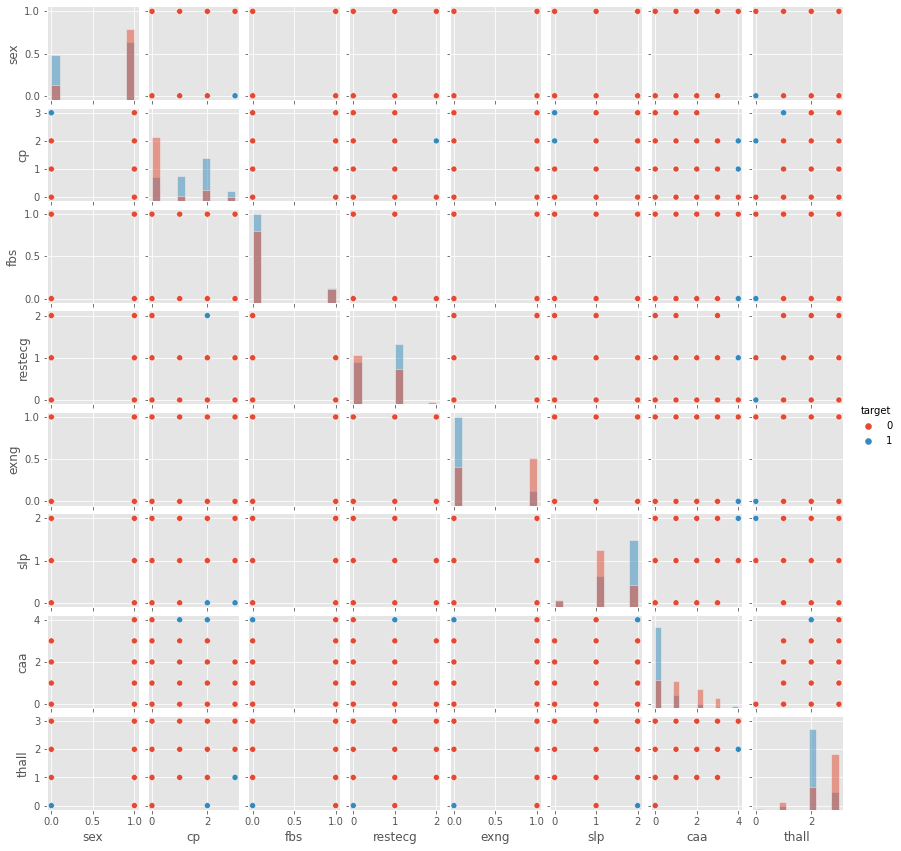

In [636]:
sns.pairplot(testing, diag_kind = 'hist', height = 1.5 , hue = 'target' )

# Gender of patients

<AxesSubplot:title={'center':'Gender Distribution'}, ylabel='output'>

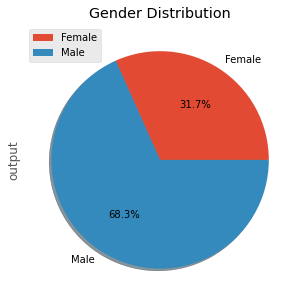

In [637]:
# make groupby and pie graph to see how the percentage [ male and female]

labels = ['Female' , 'Male']

heart_df.groupby('sex')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(5,5),title="Gender Distribution" , labels = labels, legend = True)

Gender of patients
* Males patients: 68.3%
* Female patients: 31.7%

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

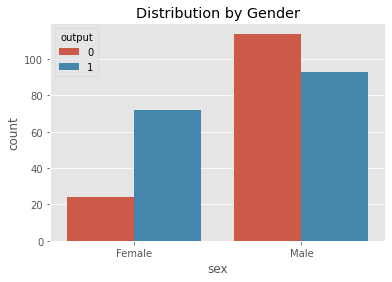

In [237]:
fig = sns.countplot(x='sex', hue=heart_df['output'], data=cat_var)
fig.set_title('Distribution by Gender')
fig.set_xticklabels(['Female', 'Male'])

About two thirds of patients with risk of heart attack are men. 

# Pain Type

<AxesSubplot:title={'center':'Chest Pain Type Distribution'}, ylabel='output'>

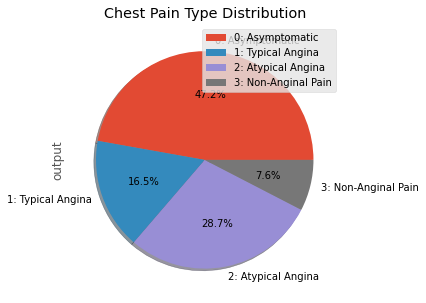

In [642]:
# make groupby and pie graph to see how the percentage [ Chest Pain type chest pain type]

labels = ['0: Asymptomatic' , '1: Typical Angina' ,  '2: Atypical Angina', '3: Non-Anginal Pain']

heart_df.groupby('cp')['output'].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(5,5),title="Chest Pain Type Distribution", labels = labels, legend = True)

cp : Chest Pain type chest pain type
* 0: Asymptomatic: 47.2%
* 1: Atypical angina: 28.7%
* 2: Typical angina: 16.5%
* 3: non-anginal pain: 7.6%

[Text(0, 0, 'Asymptomatic'),
 Text(1, 0, 'Typical Angina'),
 Text(2, 0, 'Atypical Angina'),
 Text(3, 0, 'Non-anginal Pain')]

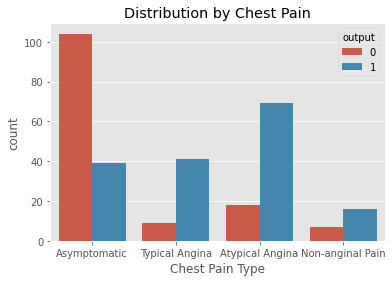

In [247]:
fig = sns.countplot(x='cp', hue=heart_df['output'], data=cat_var)
fig.set_title('Distribution by Chest Pain')
fig.set_xlabel('Chest Pain Type')
fig.set_xticklabels(['Asymptomatic', 'Typical Angina', 'Atypical Angina' , 'Non-anginal Pain'])

We can see that the Atypical Angina chest pain type is the one that has resulted in the highest number of patients with risk of 
suffering a heart attack. 

# Blood Sugar

<AxesSubplot:title={'center':'fasting blood sugar'}, ylabel='output'>

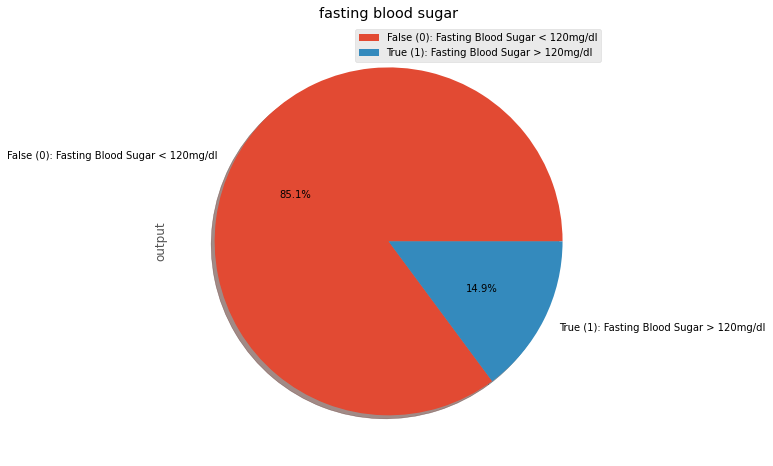

In [640]:
# make groupby and pie graph to see how the percentage [ fasting blood sugar]
labels = ['False (0): Fasting Blood Sugar < 120mg/dl','True (1): Fasting Blood Sugar > 120mg/dl']

heart_df.groupby('fbs')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(8,8),title="fasting blood sugar", labels = labels, legend = True)

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* 0 = 85.1 % (Fasting Blood Sugar < 120mg/dl)
* 1 = 14.9 % (Fasting Blood Sugar > 120mg/dl)

[Text(0, 0, 'fbs < 120mg/dl'), Text(1, 0, 'fbs > 120mg/dl')]

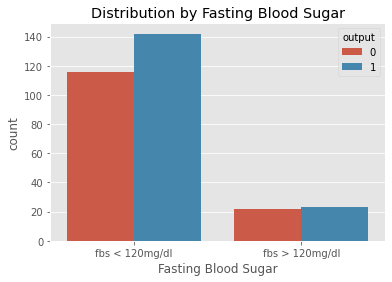

In [250]:
fig = sns.countplot(x='fbs', hue=heart_df['output'], data=cat_var)
fig.set_title('Distribution by Fasting Blood Sugar')
fig.set_xlabel('Fasting Blood Sugar')
fig.set_xticklabels(['fbs < 120mg/dl','fbs > 120mg/dl'])

Whether a patient has the fasting blood sugar above 20 mg/dl doesnt really tell us much though there is a marginally higher probability of 
being at risk of a heart attack in the event that the fbs is below 120mg/dl

## Electrocardiographic Results

<AxesSubplot:title={'center':'Electrocardiographic Results Distribution'}, ylabel='output'>

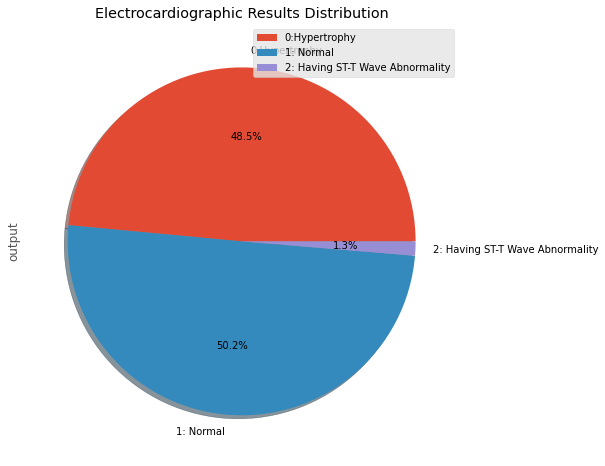

In [643]:
# make groupby and pie graph to see how the percentage [ Electrocardiographic results]

labels = ['0:Hypertrophy','1: Normal','2: Having ST-T Wave Abnormality']

heart_df.groupby('restecg')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(8,8),title="Electrocardiographic Results Distribution", labels = labels , legend = True)

rest_ecg : resting electrocardiographic results
* Value 0: normal = 48.5%
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) = 50.2 %
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria = 1.3 %

[Text(0, 0, 'Hypertrophy'),
 Text(1, 0, 'Normal'),
 Text(2, 0, 'ST-T Wave Abnormality')]

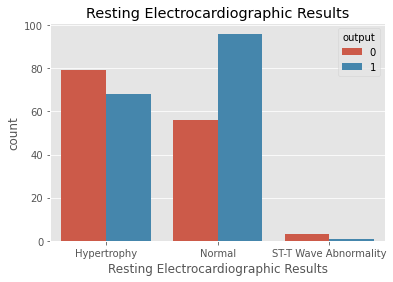

In [617]:
fig = sns.countplot(x='restecg', hue=heart_df['output'], data=cat_var)
fig.set_title('Resting Electrocardiographic Results')
fig.set_xlabel('Resting Electrocardiographic Results')
fig.set_xticklabels(['Hypertrophy','Normal','ST-T Wave Abnormality'])

In this case we can see that when a Resting Electrograph comes back with an ST-T Wave abnormality result, there is a higher chance
for the patient to be at risk of a heart attack. 

## Exercise induced Angina

<AxesSubplot:title={'center':'Exercise Induced Angina'}, ylabel='output'>

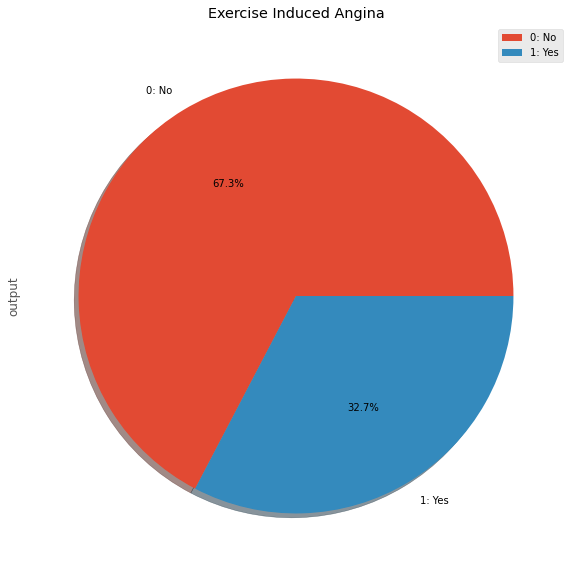

In [260]:
# make groupby and pie graph to see how the percentage [ Exercise Induced Angina]

labels = ['0: No','1: Yes']

heart_df.groupby('exng')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(10,10),title="Exercise Induced Angina", labels = labels , legend = True)

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

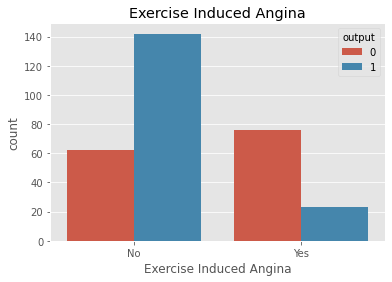

In [261]:
fig = sns.countplot(x='exng', hue=heart_df['output'], data=cat_var)
fig.set_title('Exercise Induced Angina')
fig.set_xlabel('Exercise Induced Angina')
fig.set_xticklabels(['No' , 'Yes'])

This variable tells us that when the angina is not induced by exercise, there is a much higher chance
for a patience to be at risk of a heart attack. 

## Slope of the Peak Exercises ST Segment

<AxesSubplot:title={'center':'Slope of the Peak Exercise ST Segment'}, ylabel='output'>

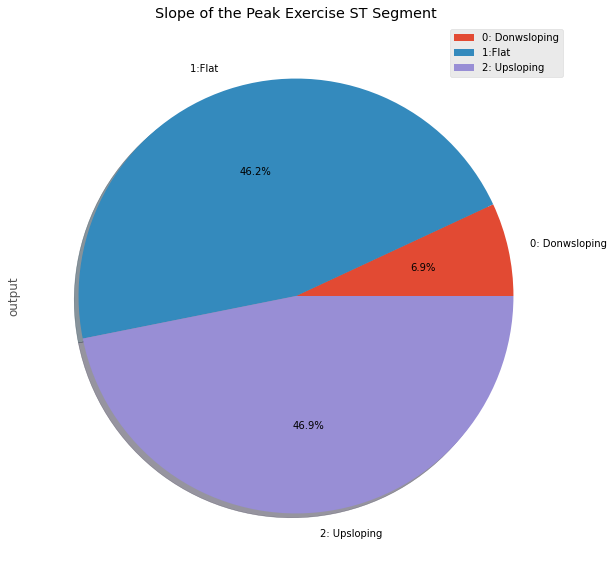

In [268]:
# make groupby and pie graph to see how the percentage [ Slope of the Peak Exercise ST Segment]

labels = ['0: Donwsloping','1:Flat ' ,'2: Upsloping ' ]

heart_df.groupby('slp')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(10,10),title="Slope of the Peak Exercise ST Segment" , labels = labels, legend = True)

[Text(0, 0, '0: Donwsloping'),
 Text(1, 0, '1:Flat '),
 Text(2, 0, '2: Upsloping ')]

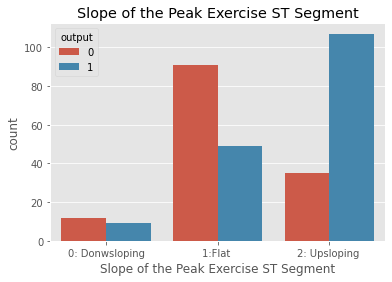

In [266]:
fig = sns.countplot(x='slp', hue=heart_df['output'], data=cat_var)
fig.set_title('Slope of the Peak Exercise ST Segment')
fig.set_xlabel('Slope of the Peak Exercise ST Segment')
fig.set_xticklabels(['0: Donwsloping','1:Flat ' ,'2: Upsloping ' ])

In this case we can see that when the slop is up sloping, there is a much higher change for a patient to be at rist of a heart attack

## Number of major vessels

<AxesSubplot:title={'center':'Number of Major Vessels'}, ylabel='output'>

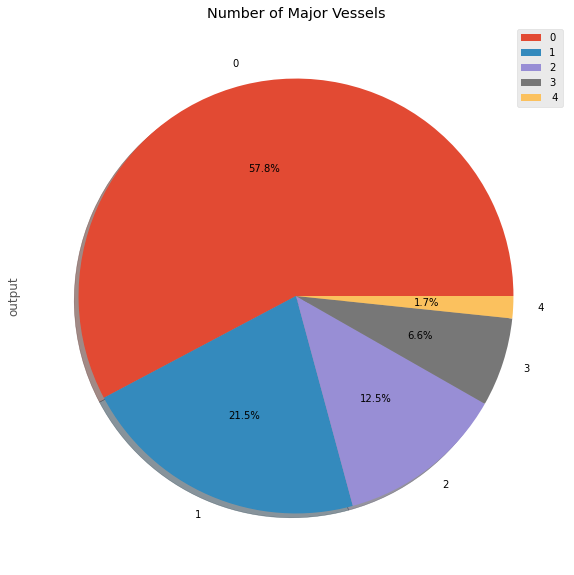

In [272]:
# make groupby and pie graph to see how the percentage [ Number of Major Vessels Colored by Fluorosopy]

labels = ['0', '1' , '2', '3', ' 4']

heart_df.groupby('caa')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(10,10),title="Number of Major Vessels" , labels = labels, legend = True)

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4')]

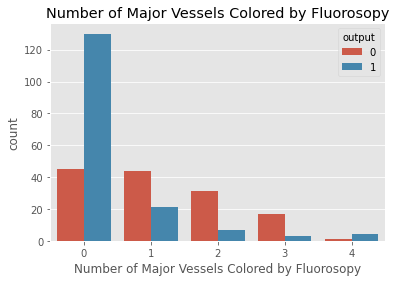

In [271]:
fig = sns.countplot(x='caa', hue=heart_df['output'], data=cat_var)
fig.set_title('Number of Major Vessels Colored by Fluorosopy')
fig.set_xlabel('Number of Major Vessels Colored by Fluorosopy')
fig.set_xticklabels(['0', '1' , '2', '3', '4' ])

Majored vessel 0 seems to be the one that has the largest number of being at risk of getting a heart attack. 

## Thallium Stress Test Result

<AxesSubplot:title={'center':'Thallium Stress Test Results'}, ylabel='output'>

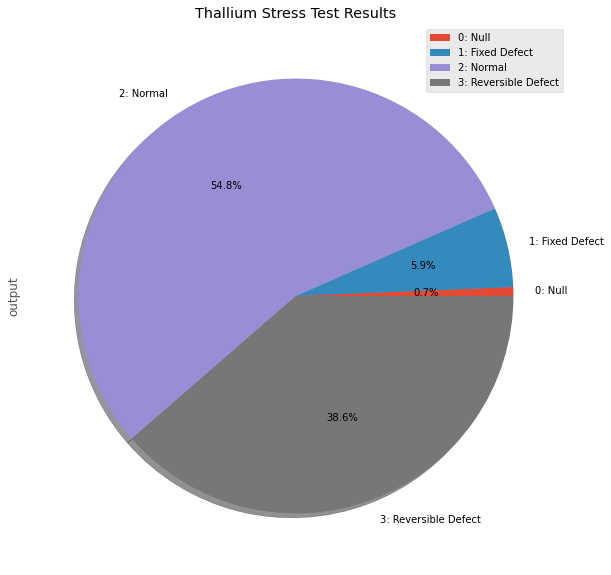

In [274]:
# make groupby and pie graph to see how the percentage [Thallium Stress Test Result ]
# Thallium is a soft silvery white metal that occurs naturally but its compounds are very poisonous. 

labels = ['0: Null', '1: Fixed Defect' , '2: Normal', '3: Reversible Defect']

heart_df.groupby('thall')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(10,10),title="Thallium Stress Test Results" , labels = labels, legend = True)

[Text(0, 0, '0: Null'),
 Text(1, 0, '1: Fixed Defect'),
 Text(2, 0, '2: Normal'),
 Text(3, 0, '3: Reversible Defect')]

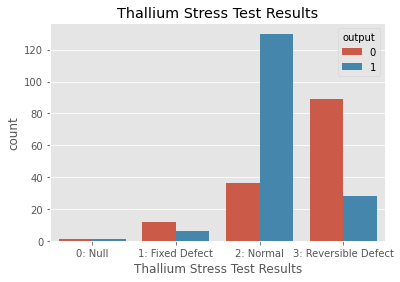

In [275]:
fig = sns.countplot(x='thall', hue=heart_df['output'], data=cat_var)
fig.set_title('Thallium Stress Test Results')
fig.set_xlabel('Thallium Stress Test Results')
fig.set_xticklabels(['0: Null', '1: Fixed Defect' , '2: Normal', '3: Reversible Defect' ])

This tells us that the stress test isnt that useful because when the results of thallium come back normal, there seems to be the highest
chance for a patient to be at risk of a heart attack. 

## Target Variable Analysis

<AxesSubplot:title={'center':'Target Variable - output'}, ylabel='output'>

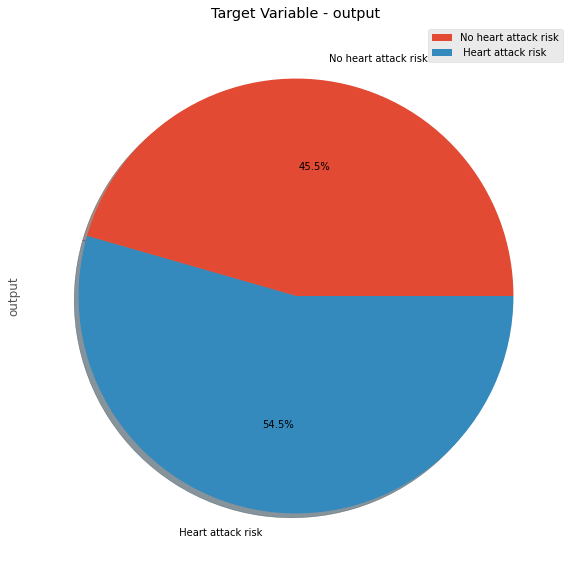

In [125]:
# make groupby and pie graph to see how the percentage [ Target Variable - output]
labels = ['No heart attack risk' , ' Heart attack risk']

heart_df.groupby('output')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Target Variable - output", labels = labels, legend = True)

Target Variable - output
* More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent .
* The target variable is quite even so there is no need to rebalance it. 

# Preprocessing / Feature Engineering

In [279]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [292]:
#We will create dummy variables for the categorical variables
cat_var.head()

,sex,cp,fbs,restecg,exng,slp,caa,thall
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


In [301]:
cat_features = cat_var.columns

In [293]:
#Instantiate the encoding element
dummy_enc = OneHotEncoder()

In [309]:
column_name = dummy_enc.get_feature_names_out(cat_features)

In [319]:
cat_var_dummy = pd.DataFrame(dummy_enc.fit_transform(cat_var).toarray(), columns = column_name)

In [320]:
cat_var_dummy.head()

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Drop the sex columns because we want to remove the gender bias

In [322]:
cat_var_df = cat_var_dummy.drop(columns = ['sex_0', 'sex_1'])

In [323]:
cat_var_df

,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exng_0,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
301,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Take a look at the continous dataframe

In [367]:
cont_var_transformed.head()

,age,trtbps,chol,log_chol,thalachh,oldpeak,log_oldpeak
0,63,145,233,5.451038,150,2.3,0.832909
1,37,130,250,5.521461,187,3.5,1.252763
2,41,130,204,5.318120,172,1.4,0.336472
3,56,120,236,5.463832,178,0.8,-0.223144
4,57,120,354,5.869297,163,0.6,-0.510826


In [368]:
#We will drop the "Chol" and the "oldpeak" columns because we will use the lognormal transformed versions of them. 
cont_var_df = cont_var_transformed.drop(columns = ['chol','oldpeak'])

In [369]:
cont_var_df.head()

,age,trtbps,log_chol,thalachh,log_oldpeak
0,63,145,5.451038,150,0.832909
1,37,130,5.521461,187,1.252763
2,41,130,5.318120,172,0.336472
3,56,120,5.463832,178,-0.223144
4,57,120,5.869297,163,-0.510826


Now combine the cleaned up categorical dataframe with the continuous variable dataframe

In [370]:
model_df = pd.concat([cat_var_df,cont_var_df] , axis = 1)

In [372]:
model_df

,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exng_0,...,caa_4,thall_0,thall_1,thall_2,thall_3,age,trtbps,log_chol,thalachh,log_oldpeak
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,63,145,5.451038,150,0.832909
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,37,130,5.521461,187,1.252763
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,41,130,5.318120,172,0.336472
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,56,120,5.463832,178,-0.223144
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,57,120,5.869297,163,-0.510826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,57,140,5.484797,123,-1.609438
299,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,45,110,5.575949,132,0.182322
300,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,68,144,5.262690,141,1.223775
301,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,57,130,4.875197,115,0.182322


Now I need to standardize my data using standard scaler

In [375]:
st_scaler = StandardScaler()
model_df_standardized = st_scaler.fit_transform(model_df)
model_df_standardized =  pd.DataFrame(model_df_standardized, columns = model_df.columns)
model_df_standardized.head()

,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exng_0,...,caa_4,thall_0,thall_1,thall_2,thall_3,age,trtbps,log_chol,thalachh,log_oldpeak
0,-0.945384,-0.444554,-0.634648,3.489114,-2.394438,2.394438,1.030158,-1.003306,-0.115663,0.696631,...,-0.129532,-0.081514,3.979112,-1.100763,-0.793116,0.952197,0.763956,-0.169434,0.015443,1.021619
1,-0.945384,-0.444554,1.575677,-0.286606,0.417635,-0.417635,-0.970725,0.996705,-0.115663,0.696631,...,-0.129532,-0.081514,-0.251312,0.908461,-0.793116,-1.915313,-0.092738,0.176670,1.633471,1.591607
2,-0.945384,2.249444,-0.634648,-0.286606,0.417635,-0.417635,1.030158,-1.003306,-0.115663,0.696631,...,-0.129532,-0.081514,-0.251312,0.908461,-0.793116,-1.474158,-0.092738,-0.822687,0.977514,0.347663
3,-0.945384,2.249444,-0.634648,-0.286606,0.417635,-0.417635,-0.970725,0.996705,-0.115663,0.696631,...,-0.129532,-0.081514,-0.251312,0.908461,-0.793116,0.180175,-0.663867,-0.106559,1.239897,-0.412065
4,1.057772,-0.444554,-0.634648,-0.286606,0.417635,-0.417635,-0.970725,0.996705,-0.115663,-1.435481,...,-0.129532,-0.081514,-0.251312,0.908461,-0.793116,0.290464,-0.663867,1.886176,0.583939,-0.802618


# Building the Machine Learning Model

In [376]:
#Importing the basic librarires for building model - classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [377]:
#Defined X value and y value , and split the data train
X = model_df_standardized
y = heart_df["output"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (227, 28)
X Test  :  (76, 28)
Y Train :  (227,)
Y Test  :  (76,)


In [547]:
#Instantiate the models

LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
XGB = XGBClassifier()
SVR = SVC()

In [625]:

# make for loop for classification 

li = [LR,DTR,RFR,KNR,MLP,XGB,SVR]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100 , roc_auc_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LogisticRegression() : 80.26315789473685 79.82578397212544
DecisionTreeClassifier() : 81.57894736842105 81.25435540069687
RandomForestClassifier() : 85.52631578947368 85.33101045296166
KNeighborsClassifier() : 84.21052631578947 84.1114982578397


/Users/danipach/opt/anaconda3/envs/LHL22Bootcamp/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier() : 80.26315789473685 79.82578397212544
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) : 80.26315789473685 80.03484320557492
SVC() : 84.21052631578947 83.69337979094077


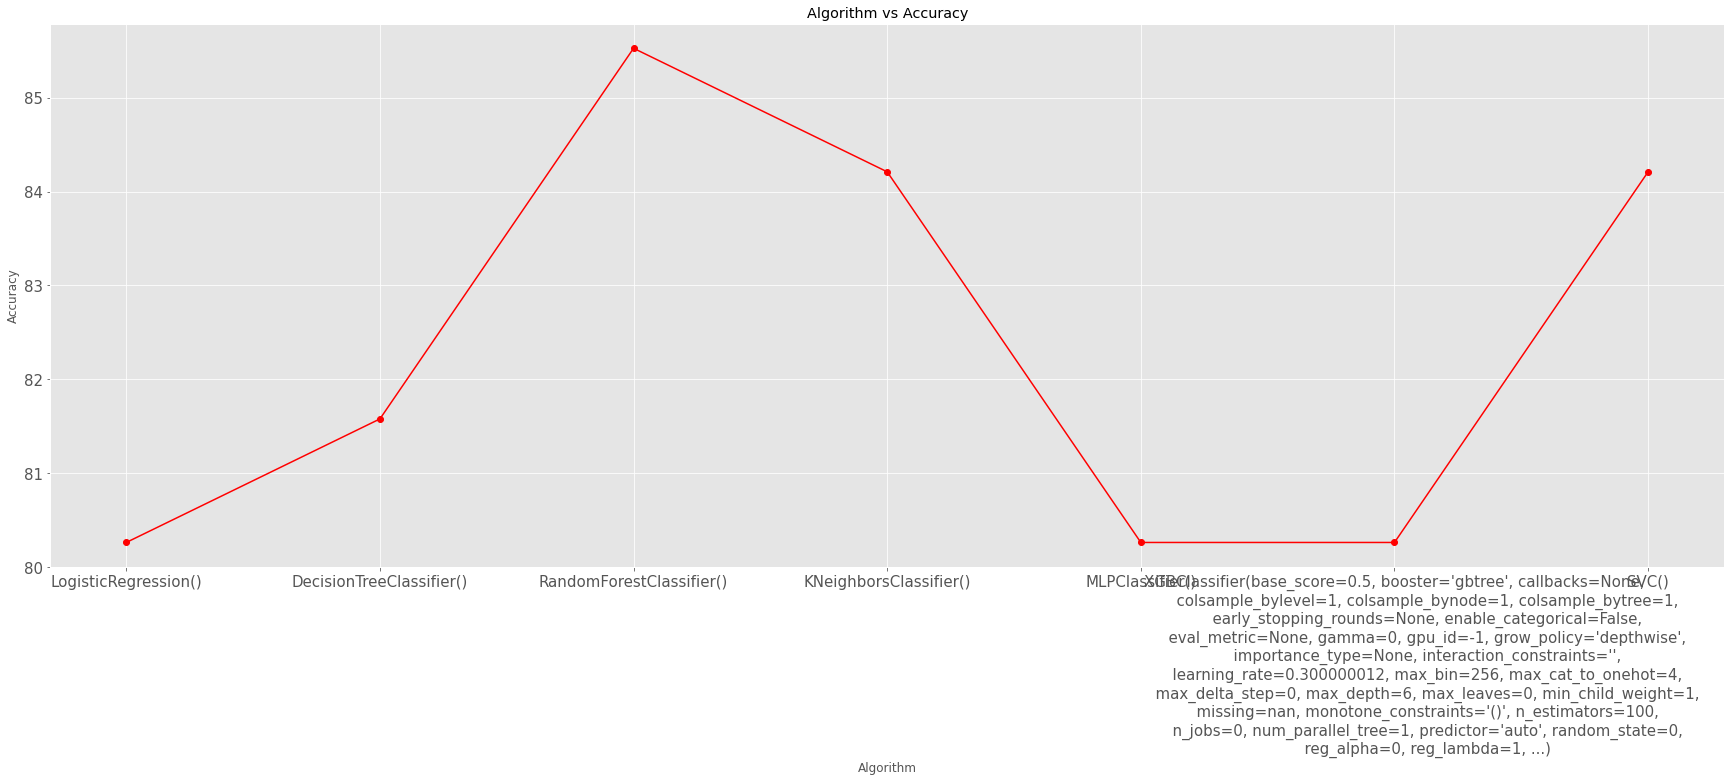

In [646]:
# make graph about Accuracy

fig1, ax1 = plt.subplots(figsize = (30,10))


plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
ax1.tick_params(labelsize = 15)

plt.show()

# Random Forest Classifier (Best Model)

In [552]:
#Fit the model
Best_Model = RandomForestClassifier(random_state = 123)
Best_Model.fit(X_train,y_train)


RandomForestClassifier(random_state=123)

In [555]:
#Predict
y_predict = Best_Model.predict(X_test)

In [556]:
accuracy_score(y_test, y_predict)

0.8421052631578947

In [557]:
#Determine Feature Importance
importances = Best_Model.feature_importances_

In [558]:
# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

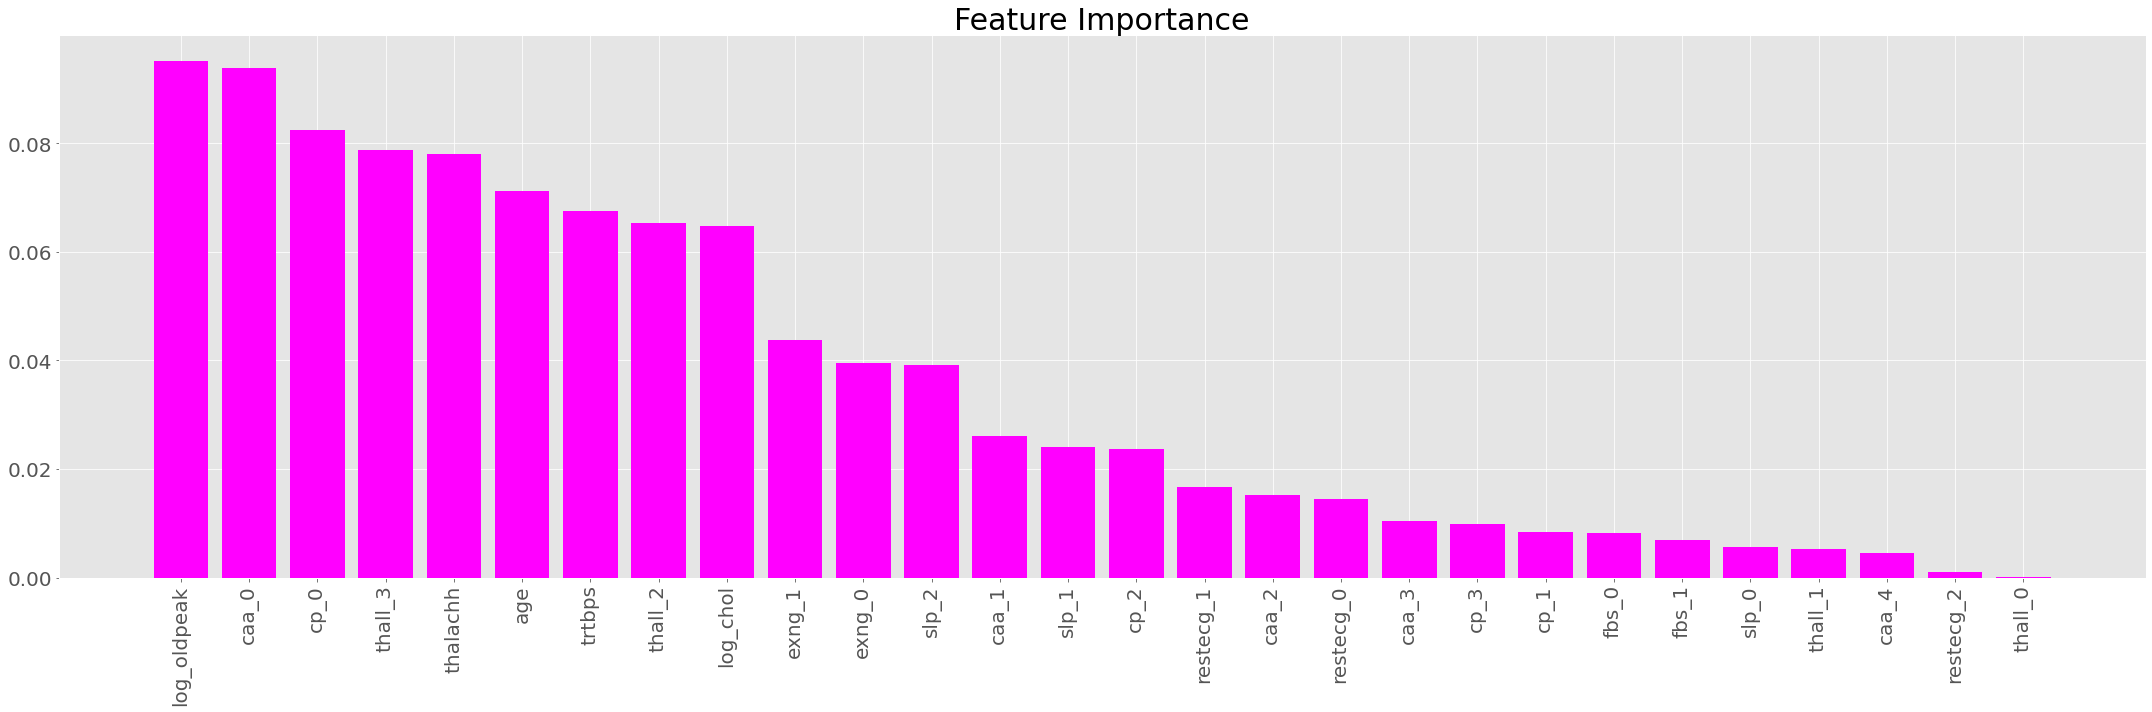

In [591]:
fig2 , ax1 = plt.subplots(figsize = (30,10))
plt.title('Feature Importance' , size = 30)
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center', color = 'magenta')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
ax1.tick_params(labelsize = 20)

plt.tight_layout()
plt.show()

In [590]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cf_matrix = confusion_matrix(y_test, y_predict)
cf_matrix

array([[28,  7],
       [ 5, 36]])

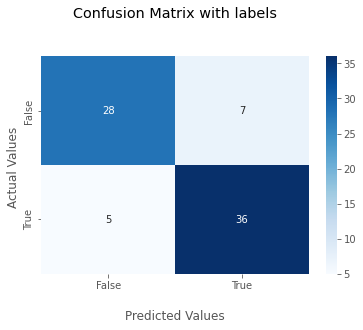

In [561]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [621]:
from sklearn.metrics import roc_auc_score

In [623]:
auc_score = roc_auc_score(y_test, y_predict)
print(auc_score)

0.8390243902439024


In [562]:
True_Value = pd.DataFrame(y_test)
True_Value = True_Value.rename(columns = {'output': 'y_true'})

In [563]:
Predicted_Value = pd.DataFrame(y_predict)
Predicted_Value = Predicted_Value.rename(columns = {0: 'y_predicted'})

In [564]:
True_Value = True_Value.reset_index(drop = True)

In [572]:
original_data = st_scaler.inverse_transform(X_test)

In [579]:
original_df = pd.DataFrame(original_data , columns = X_test.columns)

In [581]:
results = pd.concat([True_Value , Predicted_Value , original_df],axis = 1 )

In [653]:
results[['y_true', 'y_predicted', 'log_oldpeak', 'caa_0', 'cp_0' , 'thall_3', 'thalachh', 'age', 'trtbps' , 'thall_2', 'log_chol']].head(15)

,y_true,y_predicted,log_oldpeak,caa_0,cp_0,thall_3,thalachh,age,trtbps,thall_2,log_chol
0,0,0,-0.510826,0.0,1.0,0.0,112.0,57.0,150.0,0.0,5.620401
1,0,1,-1.609438,1.0,0.0,1.0,159.0,59.0,170.0,0.0,5.662960
2,1,1,-1.609438,0.0,0.0,1.0,173.0,57.0,150.0,0.0,4.836282
3,0,0,0.641854,0.0,1.0,1.0,150.0,56.0,134.0,0.0,6.013715
4,1,1,0.000000,0.0,0.0,0.0,130.0,71.0,110.0,1.0,5.579730
5,1,1,0.470004,1.0,0.0,0.0,174.0,57.0,150.0,1.0,5.123964
6,1,1,0.000000,1.0,1.0,0.0,152.0,46.0,138.0,1.0,5.493061
7,0,0,1.386294,0.0,1.0,1.0,133.0,56.0,200.0,0.0,5.662960
8,0,0,1.163151,0.0,1.0,0.0,116.0,54.0,122.0,1.0,5.655992
9,1,1,-0.693147,0.0,0.0,0.0,152.0,54.0,125.0,1.0,5.609472
